In [1]:
using Model
using Dictionaries, SplitApplyCombine
using DataFramesMeta, Dates
using CairoMakie
using StatsBase

In [2]:
decisions = Model.loaddata("../../data/processed/json_augmented");

# Patent age

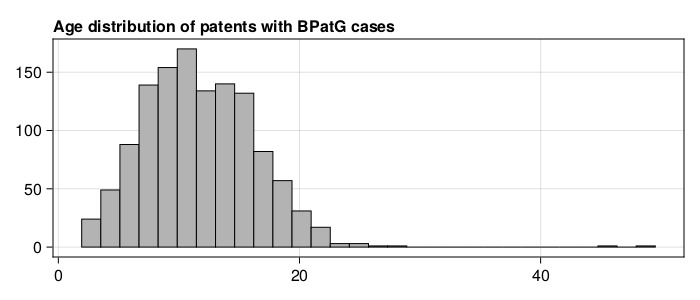

In [17]:
histargs = (bins=30, color=:grey70, strokewidth=1)
figure = (; resolution=(700,300))
axis = (; title = "Age distribution of patents with BPatG cases", titlealign=:left)
hist(patentage.(decisions); figure, axis, histargs...)

In [19]:
count(>=(10), patentage.(decisions)) / length(decisions)

0.6185819070904646

In [6]:
let i = findall(d -> patentage(d) > 30, decisions)
    d = decisions[i] |> first
    date(d), patent(d)
end

(Date("2015-07-03"), Patent("DE1516269", Date("1969-07-17"), ["G01R  13/28", "H03K  17/6257"]))

In [7]:
map(ds -> mean(patentage.(ds)), group(outcome, decisions))

3-element Dictionary{Outcome, Float64}
 Outcome(1, "partially annulled") │ 11.522992442135099
    Outcome(0, "claim dismissed") │ 12.176261899233804
           Outcome(1, "annulled") │ 11.975574645925237

In [8]:
map(ds -> mean(patentage.(ds)), group(senate, decisions))

8-element Dictionary{Senate, Float64}
 Senate(1, "1. Senate") │ 11.018951122639216
 Senate(2, "2. Senate") │ 11.927102212855637
 Senate(3, "3. Senate") │ 11.747488584474887
 Senate(4, "4. Senate") │ 11.183312577833126
 Senate(0, "0. Senate") │ 11.12509012256669
 Senate(5, "5. Senate") │ 12.986692759295499
 Senate(6, "6. Senate") │ 14.24995107632094
 Senate(7, "7. Senate") │ 11.91826484018265

# Patent office

In [13]:
function summarize_outcome(ds)
    n = length(ds)
    countf(l) = count(d -> label(outcome(d)) == l, ds) / n
    outcome_labels = ("claim dismissed", "partially annulled", "annulled")
    dismissed, partial, annulled = round.(countf.(outcome_labels); digits=3)
    (;n, dismissed, partial, annulled)
end;

In [14]:
map(summarize_outcome, group(office ∘ patent, decisions))

2-element Dictionary{String, NamedTuple{(:n, :dismissed, :partial, :annulled), Tuple{Int64, Float64, Float64, Float64}}}
 "EP" │ (n = 880, dismissed = 0.243, partial = 0.56, annulled = 0.197)
 "DE" │ (n = 347, dismissed = 0.233, partial = 0.585, annulled = 0.182)